# Scikit-learn Perceptron

붓꽃(iris) 데이터셋을 사용하여 퍼셉트론 모델을 훈련하고 결과를 시각화 합니다.
iris 데이터는 150개의 샘플 데이터를 가지고 있으며, 3개의 클래스로 분류되어 있습니다.
각 샘플은 꽃잎(petal)과 꽃받침(sepal)의 길이(cm)와 너비(cm)를 가지고 있습니다.

In [3]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# matplotlib font change
plt.rcParams['font.family'] = 'AppleGothic'
# # CHECK VERSION
# import sklearn
# print(sklearn.__version__)
# print(np.__version__)

In [4]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [5]:
print("붓꽃 데이터셋 크기: ", df.shape)

붓꽃 데이터셋 크기:  (150, 4)


In [6]:
print("붓꽃 데이터셋의 데이터 타입")
print(df.dtypes)

붓꽃 데이터셋의 데이터 타입
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object


In [7]:
print("붓꽃 데이터셋의 상위 5개 데이터")
print(df.head())

붓꽃 데이터셋의 상위 5개 데이터
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [8]:
print("붓꽃 데이터셋의 통계 정보")
print(df.describe())

붓꽃 데이터셋의 통계 정보
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


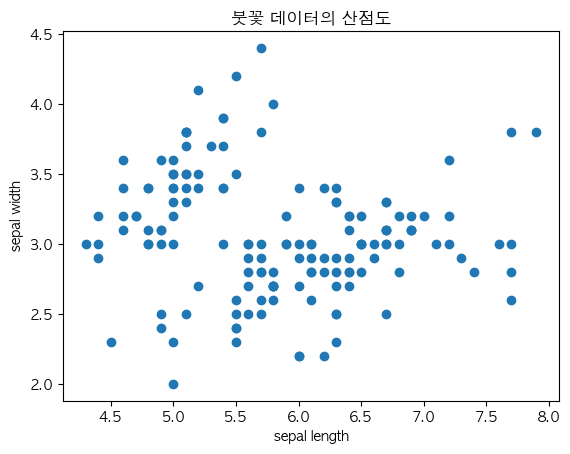

In [9]:
# Data Visualization
# 1. Scatter Plot
x = df['sepal length (cm)']
y = df['sepal width (cm)']
plt.scatter(x, y, marker='o')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
# title
plt.title('붓꽃 데이터의 산점도')
plt.show()

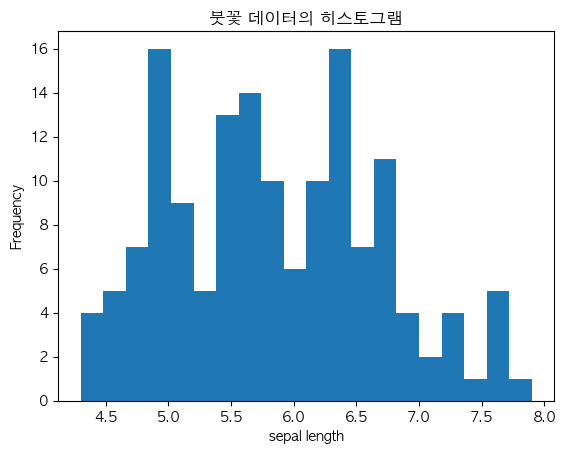

In [10]:
# 2. Histogram
x = df['sepal length (cm)']
plt.hist(x, bins=20)
plt.xlabel('sepal length')
plt.ylabel('Frequency')
plt.title('붓꽃 데이터의 히스토그램')
plt.show()

In [11]:
# 꽃잎 길이와 너비를 특성 행렬 X에 할당 하고 꽃 품종에 해당 하는 클래스 레이블을 벡터 y에 할당
x = iris.data[:, [2,3]]
y = iris.target

In [12]:
print('클레스 레이블: ', np.unique(y))

클레스 레이블:  [0 1 2]


In [13]:
from sklearn.model_selection import train_test_split

xtr, xte, ytr, yte = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)

In [14]:
print('y의 레이블 카운드: ', np.bincount(y))
print('y train (yta)의 레이블 카운트:', np.bincount(ytr))
print('y test (yte)의 레이블 카운트:', np.bincount(yte))

y의 레이블 카운드:  [50 50 50]
y train (yta)의 레이블 카운트: [35 35 35]
y test (yte)의 레이블 카운트: [15 15 15]


In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(xtr)
xtr_std = sc.transform(xtr)
xte_std = sc.transform(xte)

In [16]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(xtr_std, ytr)

Perceptron(eta0=0.1, random_state=1)

In [17]:
ypred = ppn.predict(xte_std)
print("잘못 분류된 샘플 개수: %d" % (yte != ypred).sum())

잘못 분류된 샘플 개수: 1


In [18]:
from sklearn.metrics import accuracy_score
print("정확도: %.3f" % accuracy_score(yte, ypred))

정확도: 0.978


## 퍼셉트론 모델의 결정 경계 시각화

In [23]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(x, y, classifier, test_idx=None, resolution=0.02):
    makers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max,resolution),
                           np.arange(x2_min, x2_max,resolution))
    
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=makers[idx], label=cl,
                    edgecolor='black')
    if test_idx:
        x_test, y_test = x[test_idx, :], y[test_idx]
        plt.scatter(x_test[:, 0], x_test[:, 1],
                    c='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='test set')

/var/folders/k2/fbzjm6cn4_1_7pdkyg78h17m0000gn/T/ipykernel_32413/397660911.py:11: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/Users/asanobm/miniconda3/envs/pytorch-study/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


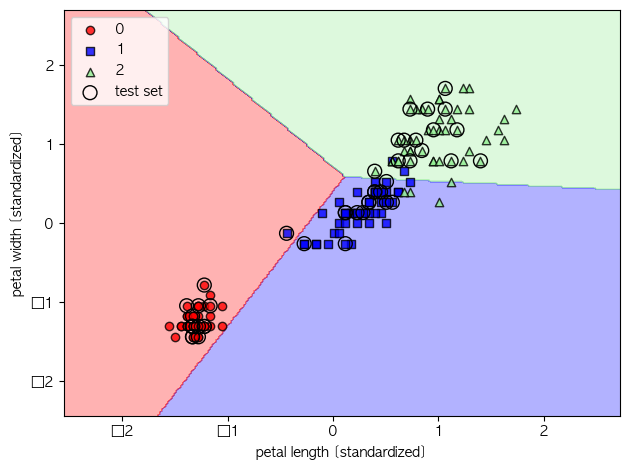

In [24]:
X_combined_std = np.vstack((xtr_std, xte_std))
y_combined = np.hstack((ytr, yte))
plot_decision_regions(x=X_combined_std,
                      y=y_combined,
                      classifier=ppn,
                      test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()